# 01 – Data Fetching Demo

This notebook demonstrates how to use our `data/fetch_data.py` utility to load market prices
and visualize them. We will:

1. Fetch data for a small set of tickers
2. Inspect the raw inputs
3. Plot the price series


In [17]:
# Imports
import os, sys, numpy as np, matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams["font.family"] = "Times New Roman" # Set font to Times New Roman
# Add the repo root (one level up from notebooks) to Python path
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(repo_root)


from data.fetch_data import load_prices


### Step 1: Choose tickers and time window


In [18]:
### Step 1: Choose tickers and time window
tickers = ["META", "AAPL", "MSFT", "GOOGL", "AMZN"]
start_date = "2024-01-01"
end_date = "2024-12-31"


### Step 2: Fetch prices
We use the `load_prices` function from our package.  
This returns a **wide DataFrame**: rows = dates, columns = tickers.


In [19]:
prices = load_prices(tickers, start=start_date, end=end_date)
print("Shape:", prices.shape)
print("Columns:", prices.columns.tolist())
print(prices.head())


Shape: (251, 5)
Columns: ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT']
Ticker            AAPL        AMZN       GOOGL        META        MSFT
Date                                                                  
2024-01-02  184.081497  149.929993  137.346283  344.400574  366.105499
2024-01-03  182.703156  148.470001  138.091812  342.590515  365.839020
2024-01-04  180.382828  144.570007  135.576889  345.226013  363.213165
2024-01-05  179.658951  145.240005  134.920822  350.029724  363.025665
2024-01-08  184.002182  149.100006  138.012299  356.703064  369.876465


### Step 3: Plot price series


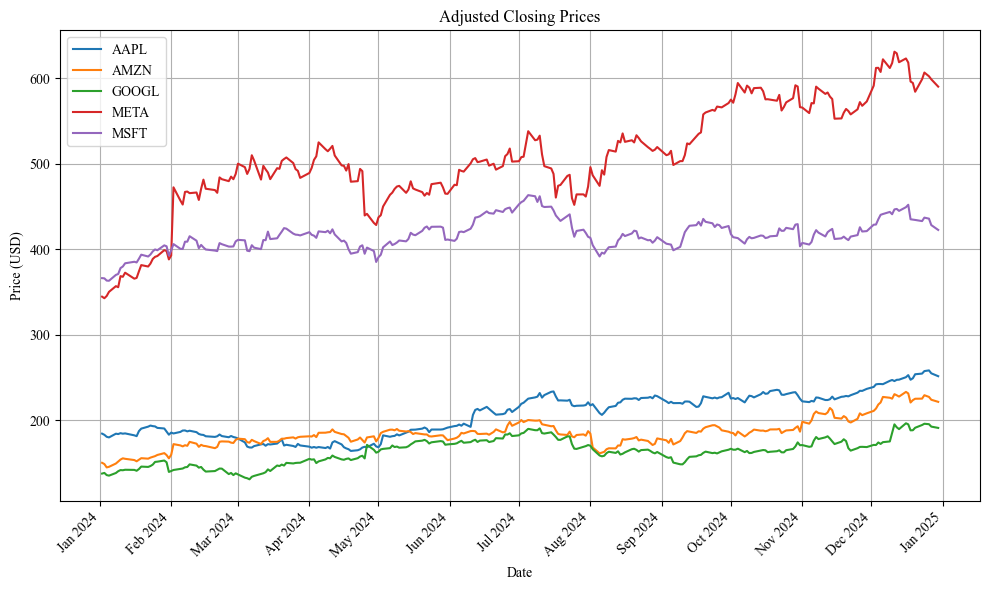

In [20]:

plt.figure(figsize=(10, 6))
ax = plt.gca()

prices.plot(ax=ax)

# Format x-axis by month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # tick every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g. "Jan 2022"

plt.title("Adjusted Closing Prices")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.grid(True)
plt.legend(loc="upper left")

plt.xticks(rotation=45)  # rotate labels for readability
plt.tight_layout()
plt.show()


### Step 4: Plot normalized (rebased) prices
Often we normalize all tickers to start at 1.0 to compare growth.


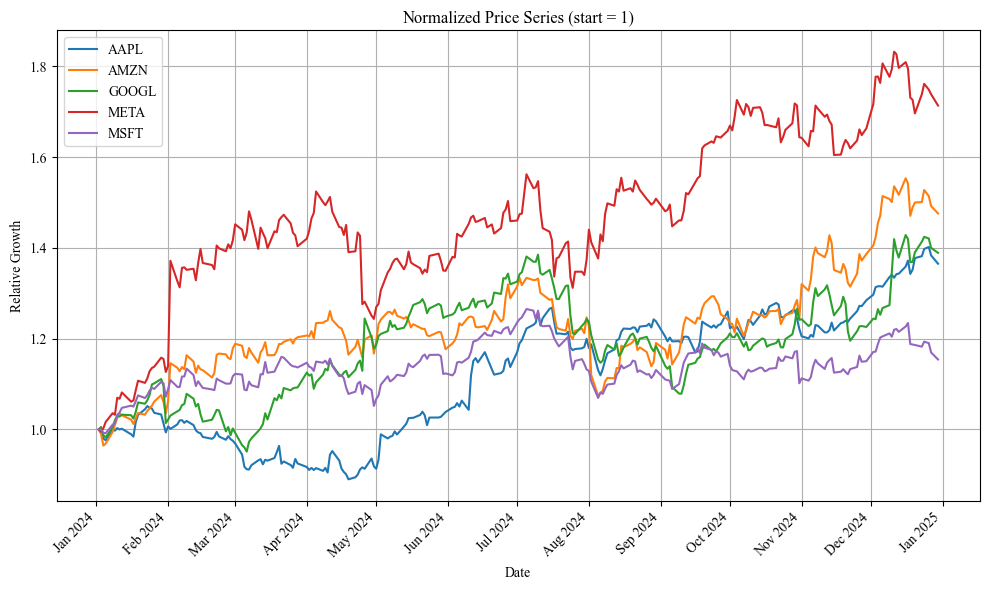

In [22]:
normalized = prices / prices.iloc[0]
plt.figure(figsize=(10, 6))
ax = plt.gca()

normalized.plot(ax=ax)

# Format x-axis to show months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))   # tick every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))   # e.g. "Jan 2022"

plt.title("Normalized Price Series (start = 1)")
plt.ylabel("Relative Growth")
plt.xlabel("Date")
plt.grid(True)
plt.legend(loc="upper left")

plt.xticks(rotation=45)  # rotate labels
plt.tight_layout()
plt.show()